<a href="https://colab.research.google.com/github/pipreaper/colabatory/blob/master/chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: DtypeWarning: Columns (3,37,38,39,40,41,42,43,44,45,46,126) have mixed types.Specify dtype option on import or set low_memory=False.


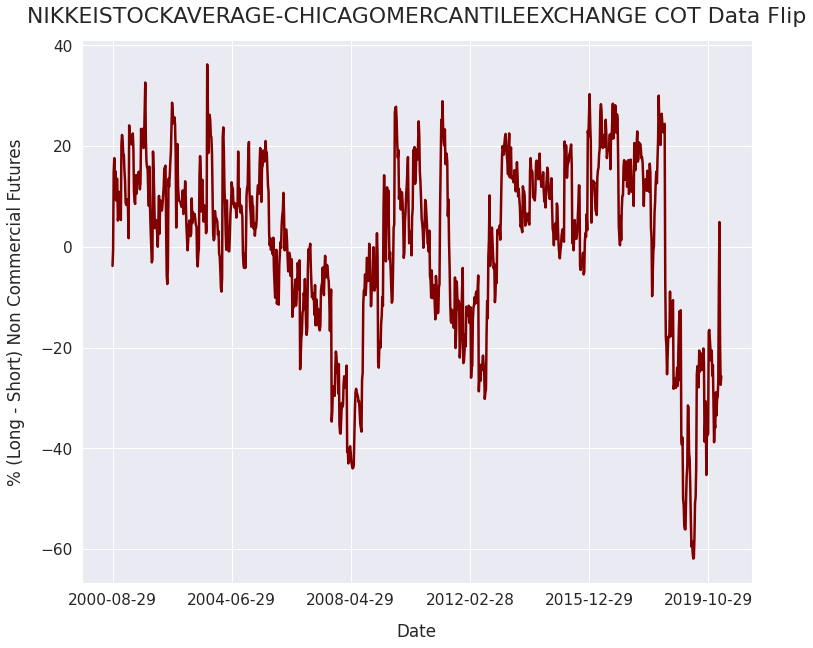

In [21]:
# install dependancies
from google.colab import drive
from google.colab import files
# Seaborn for plotting and styling
import seaborn as sns
import numpy as np
import pandas as pd
from os import listdir
from os import chdir
import matplotlib.pyplot as plt
plt.style.use('bmh')

## consolidateDataFiles ##
def consolidateDataFiles():
  # change working directory-
  chdir('/content/gdrive/My Drive/COT_DATA')
  # Read all the files into one data frame
  filepaths = [f for f in listdir('/content/gdrive/My Drive/COT_DATA/') if f.endswith('.txt')]
  return (pd.concat(map(pd.read_csv, filepaths)))

## trimSortChartData ##
def trimSortChartData(df):
  df['flip'] = df['% of OI-Noncommercial-Long (All)'] - df['% of OI-Noncommercial-Short (All)']
  # sort data by 
  df = df.sort_values(['Market and Exchange Names','As of Date in Form YYMMDD'])
  # Strip all the space
  df['Market and Exchange Names'] = df['Market and Exchange Names'].str.replace(" ","")
  df['Market and Exchange Names'] = df['Market and Exchange Names'].str.replace(","," - ")
  df['Market and Exchange Names'] = df['Market and Exchange Names'].str.replace("DOLLARS","DOLLAR")
  cd = df[['Market and Exchange Names','As of Date in Form YYMMDD','As of Date in Form YYYY-MM-DD','Noncommercial Positions-Long (All)','Noncommercial Positions-Short (All)','Change in Noncommercial-Long (All)','Change in Noncommercial-Short (All)','% of OI-Noncommercial-Long (All)','% of OI-Noncommercial-Short (All)','flip']]
  cd = cd.sort_values(['Market and Exchange Names','As of Date in Form YYMMDD'])  
  return (cd)

## listGoogleDriveFIles ##
def listGoogleDriveFIles():
  !ls '/content/gdrive/My Drive/COT_DATA/'

## showChart ##
def showChart(chart_data_symbol, uid):
  #chart_data_AUD.set_index('As of Date in Form YYYY-MM-DD')['flip'].plot();
  sns.set(font_scale=1.4)
  chart_data_symbol.set_index('As of Date in Form YYYY-MM-DD')['flip'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
  plt.xlabel("Date", labelpad=15)
  plt.ylabel("% (Long - Short) Non Commercial Futures", labelpad=15)
  plt.title(uid+" COT Data Flip", y=1.02, fontsize=22);

## writeSymbolCSV ##  
def writeSymbolCSV(cds):
  ##Create a csv named data_all_csv on google drive
  cds.to_csv('data_all.csv')
  ## Write data frame to csv on google drive
  #!cp data.csv '/content/gdrive/My Drive/COT_DATA'

  ## Write a file to local hard disk
  from google.colab import files
  files.download("data_all.csv")  

## MAIN RUN
drive.mount('/content/gdrive')
df_main = consolidateDataFiles()
chart_data= trimSortChartData(df_main)
## filter rows for AUDUSD using  the boolean expression
unique_id = 'NIKKEISTOCKAVERAGE-CHICAGOMERCANTILEEXCHANGE'
#unique_id = 'AUSTRALIANDOLLAR-CHICAGOMERCANTILEEXCHANGE'
chart_data_symbol = chart_data[chart_data['Market and Exchange Names'].eq(unique_id)]
showChart(chart_data_symbol,unique_id)
writeSymbolCSV(chart_data_symbol)